In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing
import spacy
import string
import gensim
import re

In [23]:
df_movies = pd.read_csv('C:/Users/rekru/Desktop/SSE using NLP/movies.csv')
df_movies.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [24]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#создать список знаков препинания и стоп-слов
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#функция для очистки и обработки данных
def spacy_tokenizer(sentence):
 
    #удаление отвлекающие одинарные кавычки
    sentence = re.sub('\'','',sentence)

    #удаление цифр и слов, содержащие цифры
    sentence = re.sub('\w*\d\w*','',sentence)

    #замена лишних пробелов одним пробелом
    sentence = re.sub(' +',' ',sentence)

    #удаление ненужных строк, начинающиеся со специальных символов
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    
    #удалить неразрывные символы новой строки
    sentence = re.sub(r'\n',' ',sentence)
    
    #убрать знаки препинания
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    
    #создание объекта токена
    tokens = spacy_nlp(sentence)
    
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    
    #удаление стоп-слов и исключение слов длиной менее 2 символов
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    
    return tokens

In [25]:
print ('Cleaning and Tokenizing...')
%time df_movies['wiki_plot_tokenized'] = df_movies['wiki_plot'].map(lambda x: spacy_tokenizer(x))

df_movies.head()

Cleaning and Tokenizing...
CPU times: total: 18.8 s
Wall time: 18.9 s


,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_tokenized
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[day, daughter, wedding, vito, corleone, hear,..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[banker, andy, dufresne, convict, murder, wife..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[germans, polish, jews, kraków, ghetto, world,..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[brief, scene, age, overweight, italian, ameri..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[early, december, american, expatriate, rick, ..."


In [26]:
movie_plot = df_movies['wiki_plot_tokenized']
movie_plot[0:5]

0    [day, daughter, wedding, vito, corleone, hear,...
1    [banker, andy, dufresne, convict, murder, wife...
2    [germans, polish, jews, kraków, ghetto, world,...
3    [brief, scene, age, overweight, italian, ameri...
4    [early, december, american, expatriate, rick, ...
Name: wiki_plot_tokenized, dtype: object

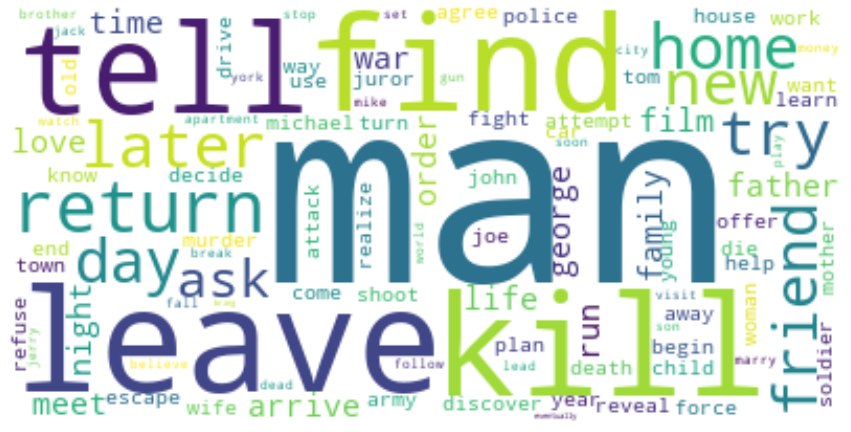

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(movie_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
from gensim import corpora

#создание словаря терминов
%time dictionary = corpora.Dictionary(movie_plot)

stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

CPU times: total: 31.2 ms
Wall time: 30.9 ms


In [29]:
#выведем 50 элементов из словаря с их уникальным идентификатором токена
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['abrasive', 0], ['abroad', 1], ['abuse', 2], ['accept', 3], ['accuse', 4], ['act', 5], ['adams', 6], ['add', 7], ['address', 8], ['agree', 9], ['ambush', 10], ['angeles', 11], ['answer', 12], ['anthony', 13], ['apollonia', 14], ['arrange', 15], ['ask', 16], ['assassin', 17], ['assassination', 18], ['associate', 19], ['attack', 20], ['attempt', 21], ['authority', 22], ['aware', 23], ['baron', 24], ['barzini', 25], ['battle', 26], ['bed', 27], ['betrayal', 28], ['bodyguard', 29], ['bomb', 30], ['booth', 31], ['brasi', 32], ['brasis', 33], ['break', 34], ['bronx', 35], ['brother', 36], ['business', 37], ['buy', 38], ['capos', 39], ['captain', 40], ['car', 41], ['career', 42], ['carlo', 43], ['casino', 44], ['christening', 45], ['christmas', 46], ['clampdown', 47], ['clemenza', 48], ['collapse', 49], ['come', 50]]]


In [30]:
corpus = [dictionary.doc2bow(desc) for desc in movie_plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('abrasive', 2), ('abroad', 2), ('abuse', 4), ('accept', 6), ('accuse', 2), ('act', 2), ('adams', 3), ('add', 2), ('address', 2), ('agree', 2), ('ambush', 2), ('angeles', 2), ('answer', 2), ('anthony', 3), ('apollonia', 2), ('arrange', 2), ('ask', 2), ('assassin', 4), ('assassination', 4), ('associate', 2), ('attack', 4), ('attempt', 4), ('authority', 2), ('aware', 2), ('baron', 2), ('barzini', 7), ('battle', 2), ('bed', 2), ('betrayal', 2), ('bodyguard', 2), ('bomb', 2), ('booth', 2), ('brasi', 3), ('brasis', 2), ('break', 2), ('bronx', 2), ('brother', 6), ('business', 6), ('buy', 2), ('capos', 3), ('captain', 2), ('car', 2), ('career', 2), ('carlo', 7), ('casino', 2), ('christening', 4), ('christmas', 2), ('clampdown', 2), ('clemenza', 3), ('collapse', 2), ('come', 4), ('command', 2), ('confess', 2), ('confront', 2), ('connection', 2), ('connie', 4), ('connies', 2), ('consigliere', 5), ('contact', 2), ('corleone', 10), ('corleones', 4), ('corps', 3), ('coveted', 2), ('crime', 2), (

In [31]:
%time movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: total: 15.6 ms
Wall time: 17 ms
CPU times: total: 2.72 s
Wall time: 590 ms


In [32]:
%time gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])

CPU times: total: 109 ms
Wall time: 104 ms
CPU times: total: 93.8 ms
Wall time: 88.7 ms


In [33]:
#Загружаем индексированный корпус
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(100 documents, 8420 features, 26018 non-zero entries)
MmCorpus(100 documents, 100 features, 10000 non-zero entries)


In [34]:
from gensim.similarities import MatrixSimilarity

%time movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)

CPU times: total: 0 ns
Wall time: 11 ms


In [35]:
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Movie Title': df_movies['title'][movie[0]],
                'Movie Plot': df_movies['wiki_plot'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Movie Title','Movie Plot'])

In [36]:
# поиск фрагментов фильма, связанных с приведенными ниже параметрами поиска
search_similar_movies('crime and drugs')

,Relevance,Movie Title,Movie Plot
0,81.61,Goodfellas,"Henry Hill (Liotta) admits, ""As far back as I ..."
1,34.11,The French Connection,"In Marseille, an undercover detective is follo..."
2,32.20,The Godfather,"On the day of his only daughter's wedding, Vit..."
3,29.01,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
4,13.22,On the Waterfront,Mob-connected union boss Johnny Friendly (Lee ...


In [37]:
# поиск фрагментов фильма, связанных с приведенными ниже параметрами поиска
search_similar_movies('violence protest')

,Relevance,Movie Title,Movie Plot
0,80.41,Gandhi,The screenplay of Gandhi is available as a pub...
1,56.68,A Clockwork Orange,"In futuristic London, Alex DeLarge is the lead..."
2,14.48,All Quiet on the Western Front,\n\n\n\n\nThis section's plot summary may be t...
3,13.86,The Bridge on the River Kwai,"In World War II, British prisoners arrive at a..."
4,8.94,The African Queen,Robert Morley and Katharine Hepburn play Samue...


In [38]:
# поиск фрагментов фильма, связанных с приведенными ниже параметрами поиска
search_similar_movies('veteran')

,Relevance,Movie Title,Movie Plot
0,66.14,The Best Years of Our Lives,"After World War II, Fred Derry (Dana Andrews),..."
1,44.82,The Exorcist,Lankester Merrin is a veteran Catholic priest ...
2,36.00,An American in Paris,American World War II veteran Jerry Mulligan (...
3,31.77,The Deer Hunter,Act I[edit] Act I Act I [edit] [ [ edit ...
4,30.67,Apocalypse Now,"In 1969, U.S. Army Captain and special operati..."


In [40]:
import tkinter as tk
from tkinter import scrolledtext  
def clicked():  
    res = txt.get() 
    lbl.configure(text=res)
  
window = Tk()  
window.title("Семантический поиск похожих фильмов")  
window.geometry('500x200')  
lbl = Label(window, text="Привет")  
lbl.grid(column=0, row=0)
txt = Entry(window,width=10)  
txt.grid(column=1, row=0)
txt.focus() 
#txt = scrolledtext.ScrolledText(window, width=40, height=10)  
#txt.grid(column=0, row=0)
btn = Button(window, text="Не нажимать!", command=clicked)  
btn.grid(column=1, row=0)  
window.mainloop()